In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [128]:
# pip install koreanize_matplotlib 맷플랏립 한글화

In [129]:
data = pd.read_excel("./data/default of credit card clients.xls", header=1)

In [130]:
data.head()

,ID,한도액,성별,교육수준,결혼여부,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,...,6월요금,5월요금,4월요금,9월지불액,8월지불액,7월지불액,6월지불액,5월지불액,4월지불액,정상지불예측
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       30000 non-null  int64
 1   한도액      30000 non-null  int64
 2   성별       30000 non-null  int64
 3   교육수준     30000 non-null  int64
 4   결혼여부     30000 non-null  int64
 5   나이       30000 non-null  int64
 6   9월지불/연체  30000 non-null  int64
 7   8월지불/연체  30000 non-null  int64
 8   7월지불/연체  30000 non-null  int64
 9   6월지불/연체  30000 non-null  int64
 10  5월지불/연체  30000 non-null  int64
 11  4월지불/연체  30000 non-null  int64
 12  9월요금     30000 non-null  int64
 13  8월요금     30000 non-null  int64
 14  7월요금     30000 non-null  int64
 15  6월요금     30000 non-null  int64
 16  5월요금     30000 non-null  int64
 17  4월요금     30000 non-null  int64
 18  9월지불액    30000 non-null  int64
 19  8월지불액    30000 non-null  int64
 20  7월지불액    30000 non-null  int64
 21  6월지불액    30000 non-null  int64
 22  5월지불액    30000 non-nul

In [132]:
data.describe()

,ID,한도액,성별,교육수준,결혼여부,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,...,6월요금,5월요금,4월요금,9월지불액,8월지불액,7월지불액,6월지불액,5월지불액,4월지불액,정상지불예측
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [133]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5 * (x.loc['75%'] - x.loc['25%']))
    out_min = x.loc['25%'] - (1.5 * (x.loc['75%'] - x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값', '하한값'])
    result = pd.concat([x, ol_result])
    return result
    

In [134]:
outlier(data)

,ID,한도액,성별,교육수준,결혼여부,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,...,6월요금,5월요금,4월요금,9월지불액,8월지불액,7월지불액,6월지불액,5월지불액,4월지불액,정상지불예측
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000
상한값,44999.500000,525000.000000,3.500000,3.500000,3.500000,60.500000,1.500000,1.500000,1.500000,1.500000,...,132774.875000,122831.750000,121111.625000,11015.000000,1.125050e+04,10677.50000,9589.125000,9700.000000,9823.375000,0.000000
하한값,-14998.500000,-235000.000000,-0.500000,-0.500000,-0.500000,8.500000,-2.500000,-2.500000,-2.500000,-2.500000,...,-75942.125000,-70878.250000,-70657.375000,-5009.000000,-5.417500e+03,-5782.50000,-5279.875000,-5416.000000,-5705.625000,0.000000


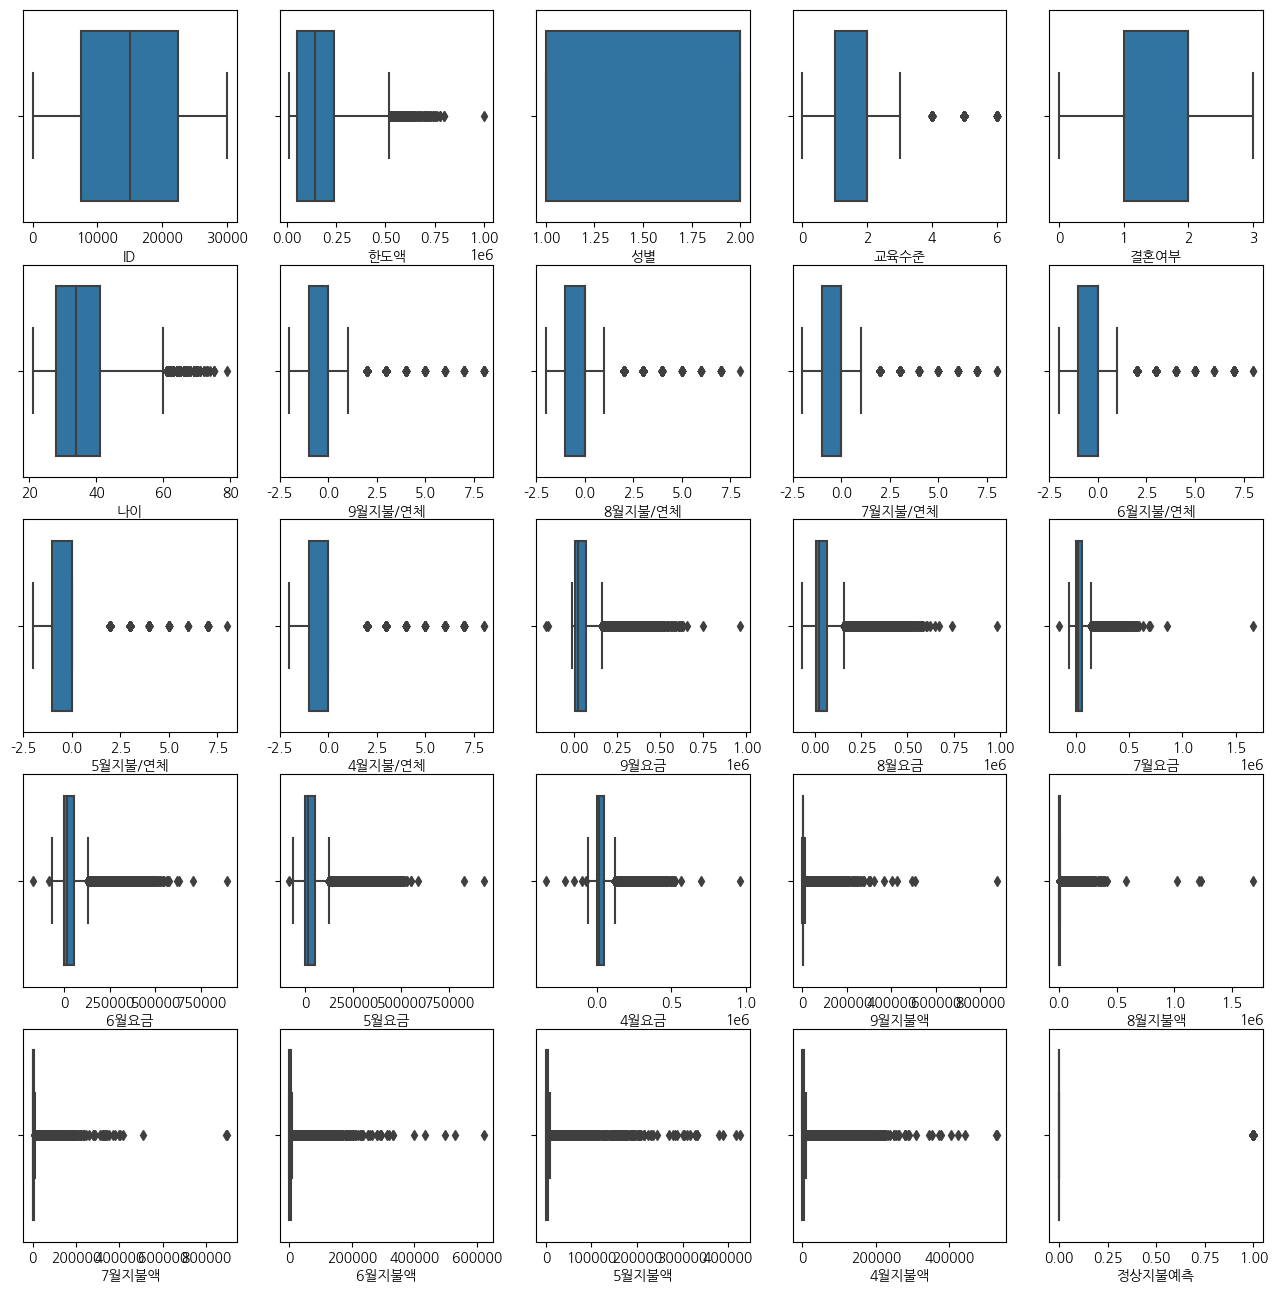

In [135]:
fig, axs = plt.subplots(figsize=(16,16), ncols=5, nrows=5)
for i, feature in enumerate(data):
    row = int(i/5)
    col = i%5
    sns.boxplot(x=data[feature], ax=axs[row][col])

* 데이터 전체에 아웃라이어 문제가 심각함

# 상관분석 및 히트맵 그리기
* corr()을 이용해 상관분석
* heatmap 그리기

In [136]:
data.corr(method='spearman')

,ID,한도액,성별,교육수준,결혼여부,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,...,6월요금,5월요금,4월요금,9월지불액,8월지불액,7월지불액,6월지불액,5월지불액,4월지불액,정상지불예측
ID,1.000000,0.030636,0.018497,0.033318,-0.028316,0.024727,-0.025029,-0.004919,-0.009176,-0.004307,...,0.032995,0.015142,0.019961,0.011925,0.050900,0.093546,0.021932,0.012320,0.037875,-0.013952
한도액,0.030636,1.000000,0.056995,-0.263575,-0.113535,0.186485,-0.296461,-0.342596,-0.331615,-0.308658,...,0.072894,0.080694,0.088094,0.272367,0.278401,0.284468,0.283411,0.293749,0.317459,-0.169586
성별,0.018497,0.056995,1.000000,0.015616,-0.031535,-0.091697,-0.053356,-0.072143,-0.067361,-0.060257,...,-0.023057,-0.015097,-0.010868,-0.003834,0.008007,0.020450,0.013536,0.014731,0.033591,-0.039961
교육수준,0.033318,-0.263575,0.015616,1.000000,-0.162415,0.158731,0.132288,0.168715,0.162047,0.151878,...,0.069018,0.060286,0.055977,-0.041727,-0.046651,-0.042048,-0.043324,-0.049463,-0.053060,0.044369
결혼여부,-0.028316,-0.113535,-0.031535,-0.162415,1.000000,-0.462810,0.023312,0.036950,0.041867,0.044805,...,0.005736,0.003680,0.004795,-0.003407,-0.015065,-0.012432,-0.015854,-0.012817,-0.014808,-0.026490
나이,0.024727,0.186485,-0.091697,0.158731,-0.462810,1.000000,-0.063733,-0.083271,-0.083192,-0.080190,...,-0.003330,-0.000342,0.000217,0.033580,0.044192,0.033356,0.040529,0.038125,0.038977,0.005149
9월지불/연체,-0.025029,-0.296461,-0.053356,0.132288,0.023312,-0.063733,1.000000,0.627170,0.548112,0.516156,...,0.306818,0.298782,0.289055,-0.098315,-0.063549,-0.054153,-0.034312,-0.026223,-0.045015,0.292213
8월지불/연체,-0.004919,-0.342596,-0.072143,0.168715,0.036950,-0.083271,0.627170,1.000000,0.799388,0.713212,...,0.497540,0.478029,0.459427,0.020401,0.083520,0.087311,0.095036,0.099155,0.082265,0.216919
7월지불/연체,-0.009176,-0.331615,-0.067361,0.162047,0.041867,-0.083192,0.548112,0.799388,1.000000,0.801047,...,0.531436,0.507209,0.484530,0.215548,0.037020,0.103370,0.118790,0.124204,0.098356,0.194771
6월지불/연체,-0.004307,-0.308658,-0.060257,0.151878,0.044805,-0.080190,0.516156,0.713212,0.801047,1.000000,...,0.592718,0.561290,0.533639,0.185478,0.246221,0.069251,0.144446,0.161743,0.142570,0.173690


<Axes: >

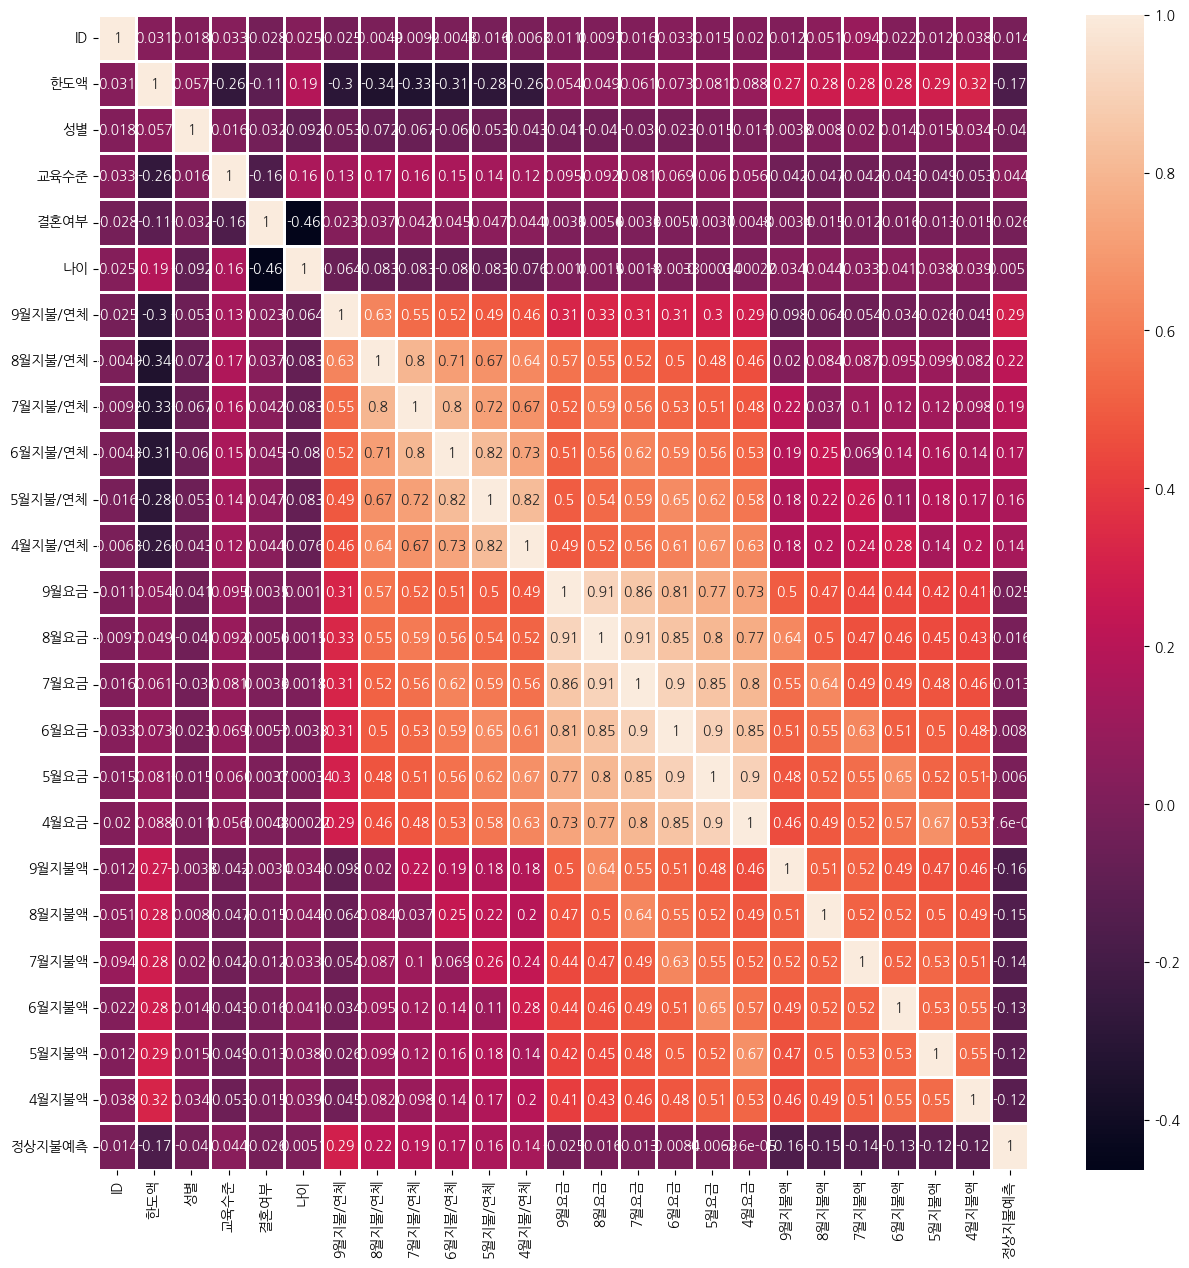

In [137]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(method='spearman'), annot=True, linecolor="white", linewidths=1)

In [138]:
import warnings
warnings.filterwarnings(action='ignore')

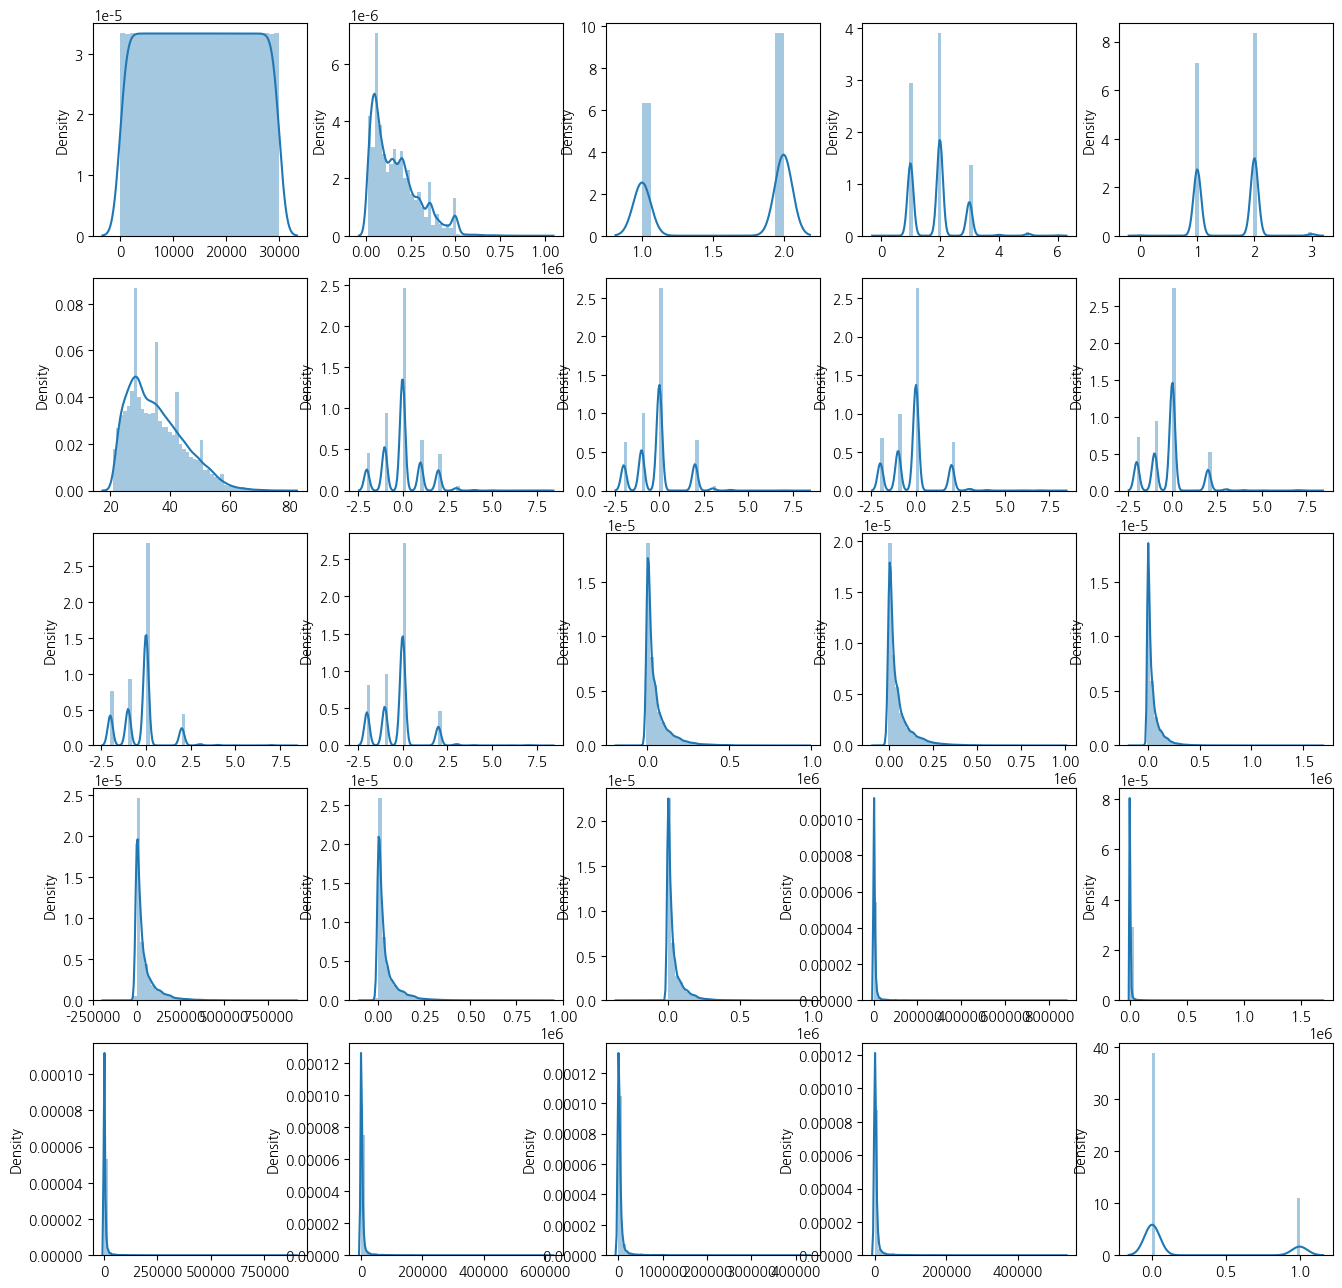

In [139]:
fig, axs = plt.subplots(figsize=(16,16), ncols=5, nrows=5)
for i, feature in enumerate(data):
    row = int(i/5)
    col = i%5
    sns.distplot(x=data[feature], ax=axs[row][col])

In [140]:
data.isnull().sum()

ID         0
한도액        0
성별         0
교육수준       0
결혼여부       0
나이         0
9월지불/연체    0
8월지불/연체    0
7월지불/연체    0
6월지불/연체    0
5월지불/연체    0
4월지불/연체    0
9월요금       0
8월요금       0
7월요금       0
6월요금       0
5월요금       0
4월요금       0
9월지불액      0
8월지불액      0
7월지불액      0
6월지불액      0
5월지불액      0
4월지불액      0
정상지불예측     0
dtype: int64

In [141]:
data['한도액'].nunique()

81

In [142]:
data.columns

Index(['ID', '한도액', '성별', '교육수준', '결혼여부', '나이', '9월지불/연체', '8월지불/연체',
       '7월지불/연체', '6월지불/연체', '5월지불/연체', '4월지불/연체', '9월요금', '8월요금', '7월요금',
       '6월요금', '5월요금', '4월요금', '9월지불액', '8월지불액', '7월지불액', '6월지불액', '5월지불액',
       '4월지불액', '정상지불예측'],
      dtype='object')

In [143]:
def c_ratio(x):
    for idx, item in zip(x.index, x):
        if idx[1] == 0:
            unpaied = item
        else:
            paied = item
            class_ratio = paied/(paied+unpaied) * 100
            print(idx, f'{class_ratio:.2f}%')


In [144]:
pay_sex = data.groupby('성별')['정상지불예측'].value_counts(sort=False)
c_ratio(pay_sex)

(1, 1) 24.17%
(2, 1) 20.78%


In [145]:
pay_sex

성별  정상지불예측
1   0          9015
    1          2873
2   0         14349
    1          3763
Name: count, dtype: int64

In [146]:
# 교육수준 1이 고학력
c_ratio(data.groupby('교육수준')['정상지불예측'].value_counts(sort=False))

(1, 1) 19.23%
(2, 1) 23.73%
(3, 1) 25.16%
(4, 1) 5.69%
(5, 1) 6.43%
(6, 1) 15.69%


In [147]:
#결혼여부에 따른 정상지불 비율
c_ratio(data.groupby('결혼여부')['정상지불예측'].value_counts(sort=False))

(0, 1) 9.26%
(1, 1) 23.47%
(2, 1) 20.93%
(3, 1) 26.01%


In [148]:
#한도액에 따른 정상지불 비율
c_ratio(data.groupby('한도액')['정상지불예측'].value_counts(sort=False))

(10000, 1) 39.96%
(20000, 1) 35.32%
(30000, 1) 35.28%
(40000, 1) 40.00%
(50000, 1) 26.30%
(60000, 1) 28.24%
(70000, 1) 28.73%
(80000, 1) 23.17%
(90000, 1) 25.50%
(100000, 1) 25.95%
(110000, 1) 22.45%
(120000, 1) 24.66%
(130000, 1) 21.54%
(140000, 1) 22.70%
(150000, 1) 16.85%
(160000, 1) 19.74%
(170000, 1) 14.66%
(180000, 1) 17.69%
(190000, 1) 21.40%
(200000, 1) 17.67%
(210000, 1) 16.03%
(220000, 1) 18.98%
(230000, 1) 15.33%
(240000, 1) 17.77%
(250000, 1) 14.57%
(260000, 1) 16.70%
(270000, 1) 11.76%
(280000, 1) 14.00%
(290000, 1) 15.23%
(300000, 1) 17.15%
(310000, 1) 9.93%
(320000, 1) 14.10%
(327680, 1) 0.37%
(330000, 1) 12.14%
(340000, 1) 14.75%
(350000, 1) 13.85%
(360000, 1) 17.48%
(370000, 1) 11.27%
(380000, 1) 12.82%
(390000, 1) 10.34%
(400000, 1) 11.44%
(410000, 1) 15.38%
(420000, 1) 10.71%
(430000, 1) 12.05%
(440000, 1) 14.46%
(450000, 1) 16.15%
(460000, 1) 12.50%
(470000, 1) 13.75%
(480000, 1) 7.59%
(490000, 1) 12.50%
(500000, 1) 11.22%
(510000, 1) 10.53%
(520000, 1) 10.00%
(5300

## 분석을 위한 독립변수 종속변수 나누기

In [149]:
X = data.drop(['ID', '정상지불예측'], axis=1)
y = data['정상지불예측']

In [150]:
X.columns

Index(['한도액', '성별', '교육수준', '결혼여부', '나이', '9월지불/연체', '8월지불/연체', '7월지불/연체',
       '6월지불/연체', '5월지불/연체', '4월지불/연체', '9월요금', '8월요금', '7월요금', '6월요금', '5월요금',
       '4월요금', '9월지불액', '8월지불액', '7월지불액', '6월지불액', '5월지불액', '4월지불액'],
      dtype='object')

In [151]:
X = pd.get_dummies(X, columns=['성별', '교육수준', '결혼여부'], drop_first=True)
X

,한도액,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,5월지불/연체,4월지불/연체,9월요금,8월요금,...,성별_2,교육수준_1,교육수준_2,교육수준_3,교육수준_4,교육수준_5,교육수준_6,결혼여부_1,결혼여부_2,결혼여부_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,True,False,True,False,False,False,False,True,False,False
1,120000,26,-1,2,0,0,0,2,2682,1725,...,True,False,True,False,False,False,False,False,True,False
2,90000,34,0,0,0,0,0,0,29239,14027,...,True,False,True,False,False,False,False,False,True,False
3,50000,37,0,0,0,0,0,0,46990,48233,...,True,False,True,False,False,False,False,True,False,False
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,False,False,False,True,False,False,False,True,False,False
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,False,False,False,True,False,False,False,False,True,False
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,False,False,True,False,False,False,False,False,True,False
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,False,False,False,True,False,False,False,True,False,False


## 독립변수간 단위 차이가 크기 때문에 스케일링 필요
* 1) **StandardScaler(기본 스케일, 평균과 표준편차를 사용)**: 평균을 제거하고 데이터를 단위 분산으로 조정함. 그러나 이상치가 있다면 평균과 표준편차에 영항을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다. 따라서 **이상치가 있는 경우 균형잡힌 척도를 보장할 수 없다.**
* 2) **MinMaxScaler(최대/최소값이 각각 1,0이 되도록 스케일링)**: 모든 Feature(독립변수) 값이 0~1사이에 있도록 데이터를 재조정한다. 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다. 즉, **MinMaxScaler 역시 이상치에 매우 민감하다.**
* 3) **MaxAbsScaler(최대 절대값과 0이 각각 1, 0이 되도록 스케일링)**: 절대값이 0-1사이에 매핑되도록 한다. -1~1 사이로 재조정한다. 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 매우 유사하게 동작하며, **큰 이상치에 민감 할 수 있다.**
* 4) **RobustScaler(중앙값(median)과 IQR(4분위수)사용, 아웃라이어의 영향을 최소화)**: 아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(사분위수)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

In [152]:
X.columns

Index(['한도액', '나이', '9월지불/연체', '8월지불/연체', '7월지불/연체', '6월지불/연체', '5월지불/연체',
       '4월지불/연체', '9월요금', '8월요금', '7월요금', '6월요금', '5월요금', '4월요금', '9월지불액',
       '8월지불액', '7월지불액', '6월지불액', '5월지불액', '4월지불액', '성별_2', '교육수준_1', '교육수준_2',
       '교육수준_3', '교육수준_4', '교육수준_5', '교육수준_6', '결혼여부_1', '결혼여부_2', '결혼여부_3'],
      dtype='object')

In [153]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [155]:
X_scaled

,한도액,나이,9월지불/연체,8월지불/연체,7월지불/연체,6월지불/연체,5월지불/연체,4월지불/연체,9월요금,8월요금,...,성별_2,교육수준_1,교육수준_2,교육수준_3,교육수준_4,교육수준_5,교육수준_6,결혼여부_1,결혼여부_2,결혼여부_3
0,-0.631579,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,-2.0,-0.290695,-0.296584,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,-0.105263,-0.615385,-1.0,2.0,0.0,0.0,0.0,2.0,-0.310071,-0.319150,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.263158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.107937,-0.117549,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.473684,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.387339,0.443008,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
4,-0.473684,1.769231,-1.0,0.0,-1.0,0.0,0.0,0.0,-0.216654,-0.254500,...,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.421053,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,2.621763,2.812369,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0
29996,0.052632,0.692308,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-0.325795,-0.317462,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,-0.578947,0.230769,4.0,3.0,2.0,-1.0,0.0,0.0,-0.296172,-0.292422,...,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,-0.315789,0.538462,1.0,-1.0,0.0,0.0,0.0,-1.0,-0.378178,0.937030,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0


## 홀드 아웃

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

## 알고리즘 불러와서 분석하기

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8098888888888889
[[6821  161]
 [1550  468]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6982
           1       0.74      0.23      0.35      2018

    accuracy                           0.81      9000
   macro avg       0.78      0.60      0.62      9000
weighted avg       0.80      0.81      0.77      9000



In [159]:
y.value_counts()

정상지불예측
0    23364
1     6636
Name: count, dtype: int64

# PCA로 차원축소 후 로스지틱 회귀분석 실시
* n_components=0.80 전체의 80% 설명 가능한 변수까지 선택
* n_components=None 모든 주성분의 분산비율 확인 가능

In [160]:
from sklearn.decomposition import PCA

In [161]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

In [162]:
pca.n_components_

30

In [163]:
X_pca[0]

array([-3.35853294e+00,  1.19591555e+00, -4.43611426e-01,  2.61081381e-01,
        1.88176451e-01, -3.98173094e-01,  1.29733066e+00,  4.23245573e-01,
        3.64067688e+00, -3.31480507e-01, -5.33760718e-01,  9.08872661e-01,
       -6.73300780e-01,  2.01305264e-01, -6.69513196e-01, -2.00327251e-02,
        1.27838272e+00, -1.95530165e-01,  6.15108954e-01,  1.02510247e-02,
       -7.25546868e-02,  2.43114225e-02, -1.98322409e-02,  2.28989262e-02,
        1.68184217e-03, -1.17178597e-02,  1.16609435e-03,  1.19471874e-03,
       -6.15205948e-04,  5.12025753e-05])

In [164]:
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)

In [165]:
pca.n_components_

6

In [166]:
X_pca[0]

array([-3.35853294,  1.19591555, -0.44361143,  0.26108138,  0.18817645,
       -0.39817309])

## PCA를 통해서 6개로 차원축소한 데이터로 분석

In [167]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.3, random_state=10)

In [168]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)
pred2 = lr2.predict(X_test2)
print(accuracy_score(y_test2, pred2))
print(confusion_matrix(y_test2, pred2))
print(classification_report(y_test2, pred2))

0.7757777777777778
[[6982    0]
 [2018    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6982
           1       0.00      0.00      0.00      2018

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



# 랜덤포레스트를 이용해서 재분석

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8163333333333334
[[6603  379]
 [1274  744]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.66      0.37      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [170]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
rfc2.fit(X_train2, y_train2)
pred2 = rfc2.predict(X_test2)
print(accuracy_score(y_test2, pred2))
print(confusion_matrix(y_test2, pred2))
print(classification_report(y_test2, pred2))

0.7751111111111111
[[6768  214]
 [1810  208]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6982
           1       0.49      0.10      0.17      2018

    accuracy                           0.78      9000
   macro avg       0.64      0.54      0.52      9000
weighted avg       0.72      0.78      0.71      9000

